In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_histogram, circuit_drawer
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
from itertools import product

Question 1

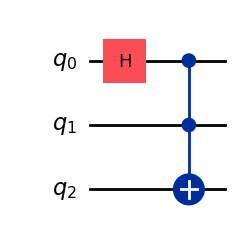

In [3]:
# Create the quantum circuit as specified
qr = QuantumRegister(3, 'q')
circuit = QuantumCircuit(qr)

# Apply Hadamard gate to q0
circuit.h(qr[0])

# Apply CCNOT (Toffoli) gate with q0 and q1 as controls, q2 as target
circuit.ccx(qr[0], qr[1], qr[2])

# show circuit
display(circuit.draw('mpl'))


# Testing All Possible Input Combinations

We'll now test the circuit with all 8 possible input combinations (2³ = 8 states for 3 qubits).

**Input states to test:** |000⟩, |001⟩, |010⟩, |011⟩, |100⟩, |101⟩, |110⟩, |111⟩

In [5]:
# Prepare to test all input combinations
# Use the Aer simulator backend (fallback to qasm_simulator if not available)
try:
    simulator = Aer.get_backend('aer_simulator')
except Exception as e:
    print("aer_simulator not available, falling back to qasm_simulator:", e)
    simulator = Aer.get_backend('qasm_simulator')
all_results = {}
shots = 1000

# Generate all possible 3-qubit input combinations
input_combinations = list(product([0, 1], repeat=3))

print("Testing all input combinations...\n")
print("=" * 60)

for input_state in input_combinations:
    # Create a new circuit for each test
    qr = QuantumRegister(3, 'q')
    cr = ClassicalRegister(3, 'c')
    test_circuit = QuantumCircuit(qr, cr)
    
    # Initialize the input state
    input_label = ''.join(map(str, input_state))
    for i, bit in enumerate(input_state):
        if bit == 1:
            test_circuit.x(qr[i])
    
    # Add a barrier for clarity
    test_circuit.barrier()
    
    # Apply the main circuit operations
    test_circuit.h(qr[0])
    test_circuit.ccx(qr[0], qr[1], qr[2])
    
    # Add measurement
    test_circuit.barrier()
    test_circuit.measure(qr, cr)
    
    # Execute the circuit
    job = simulator.run(test_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    # Store results
    all_results[input_label] = counts
    
    # Print results for this input
    print(f"Input: |{input_label}⟩")
    print(f"Output distribution: {counts}")
    print("-" * 60)

print("\nAll simulations completed successfully!")

Testing all input combinations...

Input: |000⟩
Output distribution: {'000': 476, '001': 524}
------------------------------------------------------------
Input: |001⟩
Output distribution: {'101': 519, '100': 481}
------------------------------------------------------------
Input: |010⟩
Output distribution: {'111': 488, '010': 512}
------------------------------------------------------------
Input: |011⟩
Output distribution: {'110': 531, '011': 469}
------------------------------------------------------------
Input: |100⟩
Output distribution: {'001': 484, '000': 516}
------------------------------------------------------------
Input: |101⟩
Output distribution: {'101': 487, '100': 513}
------------------------------------------------------------
Input: |110⟩
Output distribution: {'111': 510, '010': 490}
------------------------------------------------------------
Input: |111⟩
Output distribution: {'011': 514, '110': 486}
------------------------------------------------------------

All 

Question 2

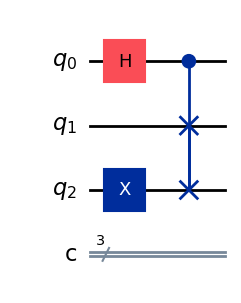

In [7]:
# Create the quantum circuit as specified
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qr, cr)

# Apply Hadamard gate to q0
circuit.h(qr[0])

# Apply Pauli-X gate to q2
circuit.x(qr[2])

# Apply Fredkin (CSWAP) gate: q0 is control, q1 and q2 are swapped
circuit.cswap(qr[0], qr[1], qr[2])

# Add measurements
#circuit.measure(qr, cr)

# show circuit
display(circuit.draw('mpl'))

# Testing All Possible Input Combinations

We'll test the circuit with all 8 possible input combinations (2³ = 8 states).

**Input states to test:** |000⟩, |001⟩, |010⟩, |011⟩, |100⟩, |101⟩, |110⟩, |111⟩

In [9]:
# Prepare to test all input combinations
simulator = Aer.get_backend('aer_simulator')
all_results = {}
shots = 1000

# Generate all possible 3-qubit input combinations
input_combinations = list(product([0, 1], repeat=3))

print("Testing all input combinations with the circuit...")
print("\n" + "="*80)
print("The circuit applies H to q0 and X to q2 AFTER initialization")
print("="*80 + "\n")

for input_state in input_combinations:
    # Create a new circuit for each test
    qr = QuantumRegister(3, 'q')
    cr = ClassicalRegister(3, 'c')
    test_circuit = QuantumCircuit(qr, cr)
    
    # Initialize the input state (before applying H and X)
    input_label = ''.join(map(str, input_state))
    for i, bit in enumerate(input_state):
        if bit == 1:
            test_circuit.x(qr[i])
    
    # Add a barrier for visual clarity
    test_circuit.barrier(label=f'Input:|{input_label}⟩')
    
    # Apply the circuit operations
    test_circuit.h(qr[0])        # Hadamard on q0
    test_circuit.x(qr[2])        # X gate on q2
    test_circuit.cswap(qr[0], qr[1], qr[2])  # Fredkin gate
    
    # Add measurement
    test_circuit.barrier(label='Measure')
    test_circuit.measure(qr, cr)
    
    # Execute the circuit
    job = simulator.run(test_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    # Store results
    all_results[input_label] = counts
    
    # Print results for this input
    print(f"Input State: |{input_label}⟩")
    print(f"  After H(q0) and X(q2): superposition on q0, q2 flipped")
    print(f"  Output Distribution: {counts}")
    print(f"  Total outcomes: {len(counts)} distinct states")
    print("-"*80)

print("\n✓ All simulations completed successfully!")
print(f"✓ Total test cases: {len(all_results)}")
print(f"✓ Shots per test: {shots}")

Testing all input combinations with the circuit...

The circuit applies H to q0 and X to q2 AFTER initialization

Input State: |000⟩
  After H(q0) and X(q2): superposition on q0, q2 flipped
  Output Distribution: {'011': 520, '100': 480}
  Total outcomes: 2 distinct states
--------------------------------------------------------------------------------
Input State: |001⟩
  After H(q0) and X(q2): superposition on q0, q2 flipped
  Output Distribution: {'000': 491, '001': 509}
  Total outcomes: 2 distinct states
--------------------------------------------------------------------------------
Input State: |010⟩
  After H(q0) and X(q2): superposition on q0, q2 flipped
  Output Distribution: {'110': 482, '111': 518}
  Total outcomes: 2 distinct states
--------------------------------------------------------------------------------
Input State: |011⟩
  After H(q0) and X(q2): superposition on q0, q2 flipped
  Output Distribution: {'010': 495, '101': 505}
  Total outcomes: 2 distinct states
---

Question 3 a

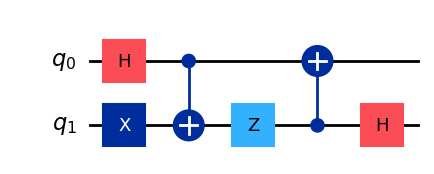

In [10]:
# Create the quantum circuit
qc = QuantumCircuit(2)

# Initialize qubit 1 to |1⟩ (qubit 0 is already |0⟩ by default)
qc.x(1)

# Apply the gates as per the circuit
qc.h(0)                    # Hadamard on qubit 0
qc.cx(0, 1)                # CNOT: control=0, target=1
qc.z(1)                    # Z gate on qubit 1
qc.cx(1, 0)                # CNOT: control=1, target=0
qc.h(1)                    # Hadamard on qubit 1

# Visualize the circuit
qc.draw('mpl', style='iqp')


Compute the Output of the Quantum Circuit

In [14]:
# Initial state: |01⟩ (qubit 0 = |0⟩, qubit 1 = |1⟩)
initial_state = Statevector.from_label('01')

print("\nInitial State: |01⟩")
print("\nInitial State Vector:")
print(initial_state)

# Create circuit for computation
qc_compute = QuantumCircuit(2)
qc_compute.x(1)  # Initialize to |01⟩
qc_compute.h(0)
qc_compute.cx(0, 1)
qc_compute.z(1)
qc_compute.cx(1, 0)
qc_compute.h(1)

# Compute final state
final_state = initial_state.evolve(qc_compute)

print("\n" + "-" * 60)
print("Final State Vector:")
print(final_state)

# Display probabilities
print("\n" + "-" * 60)
print("Measurement Probabilities:")
probs = final_state.probabilities_dict()
for state, prob in sorted(probs.items()):
    if prob > 1e-10:  # Only show non-zero probabilities
        print(f"  |{state}⟩: {prob:.6f} ({prob*100:.2f}%)")


Initial State: |01⟩

Initial State Vector:
Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))

------------------------------------------------------------
Final State Vector:
Statevector([ 0.00000000e+00+0.j, -1.00000000e+00+0.j,  0.00000000e+00+0.j,
              2.23711432e-17+0.j],
            dims=(2, 2))

------------------------------------------------------------
Measurement Probabilities:
  |01⟩: 1.000000 (100.00%)


Question 3 b
* Prove Order of Unitary Compositions is Crucial

### Create Two Circuits with Different Gate Orders
- **Circuit 1**: Apply H, then S, then T
- **Circuit 2**: Apply T, then S, then H

Both circuits use the same gates but in different orders.


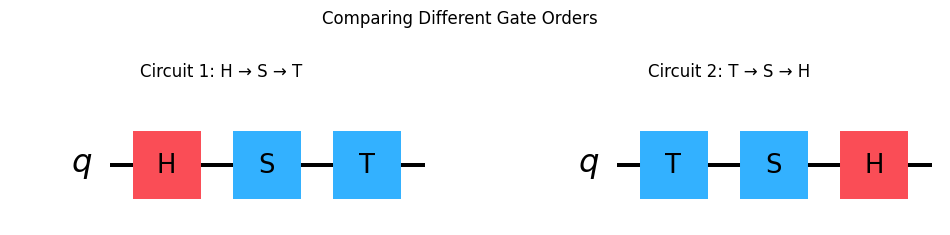

In [21]:
# Circuit 1: H → S → T
circuit1 = QuantumCircuit(1, name='H→S→T')
circuit1.h(0)
circuit1.s(0)
circuit1.t(0)

# Circuit 2: T → S → H (reverse order)
circuit2 = QuantumCircuit(1, name='T→S→H')
circuit2.t(0)
circuit2.s(0)
circuit2.h(0)

# Visualize both circuits side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# Draw circuit 1
circuit1.draw('mpl', ax=axes[0])
axes[0].set_title('Circuit 1: H → S → T')

# Draw circuit 2
circuit2.draw('mpl', ax=axes[1])
axes[1].set_title('Circuit 2: T → S → H')
fig.suptitle('Comparing Different Gate Orders')
display(fig)
plt.close(fig)

# Compute Final States for Both Circuits

In [ ]:
# Initial state |0⟩
initial = Statevector.from_label('0')

# Compute final states
final1 = initial.evolve(circuit1)
final2 = initial.evolve(circuit2)


print("\nCircuit 1 (H → S → T) Final State:")
print(final1)
print("\nProbabilities:")
for state, prob in final1.probabilities_dict().items():
    if prob > 1e-10:
        print(f"  |{state}⟩: {prob:.6f}")

print("\nCircuit 2 (T → S → H) Final State:")
print(final2)
print("\nProbabilities:")
for state, prob in final2.probabilities_dict().items():
    if prob > 1e-10:
        print(f"  |{state}⟩: {prob:.6f}")


# Check if states are equal
fidelity = np.abs(np.vdot(final1.data, final2.data))**2
print(f"\nFidelity between states: {fidelity:.6f}")

if fidelity < 0.9999:
    print("PROVEN: The states are DIFFERENT!")
    print(" This proves that the ORDER of quantum gates matters")
else:
    print("✗ The states are the same (gates commute in this case)")


Circuit 1 (H → S → T) Final State:
Statevector([ 0.70710678+0.j , -0.5       +0.5j],
            dims=(2,))

Probabilities:
  |0⟩: 0.500000
  |1⟩: 0.500000

Circuit 2 (T → S → H) Final State:
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))

Probabilities:
  |0⟩: 0.500000
  |1⟩: 0.500000

Fidelity between states: 0.146447
PROVEN: The states are DIFFERENT!
 This proves that the ORDER of quantum gates matters!
